# Importacion de la librerias y del set de datos

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


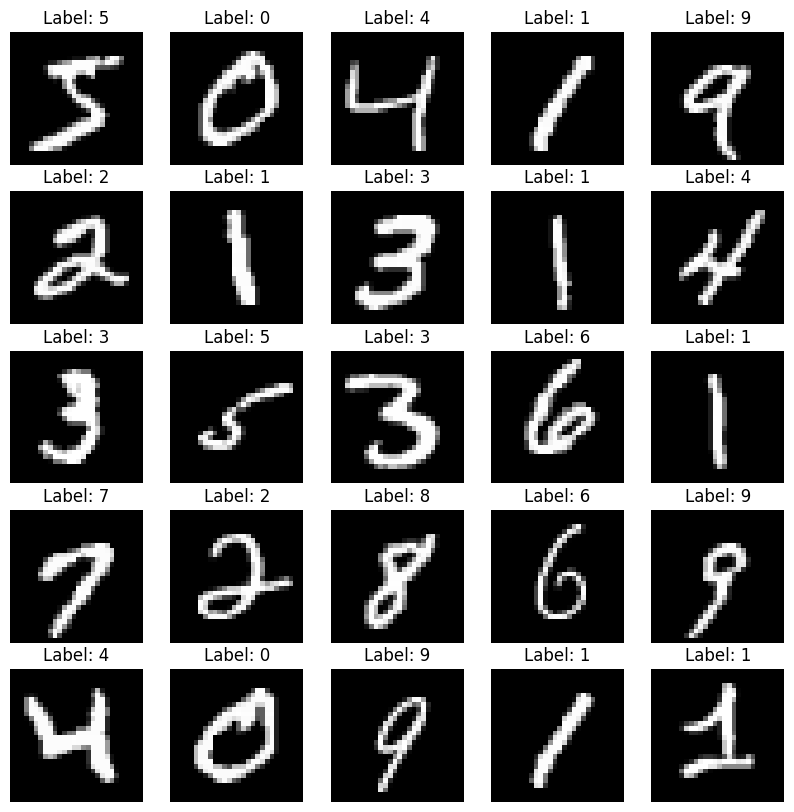

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import Normalizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import load_model
import cv2

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualización para algunos ejemplos
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# EDA

In [ ]:
print ("Cantidad de datos de X_train: ",X_train.shape)
print ("Cantidad de datos de y_train: ",y_train.shape)
print ("Cantidad de datos de X_test: ",X_test.shape)
print ("Cantidad de datos de y_test: ",y_test.shape)

print ("----------------------------------------------")


print ("tipos de datos del target: ",np.unique(y_test))

Cantidad de datos de X_train:  (60000, 28, 28)
Cantidad de datos de y_train:  (60000,)
Cantidad de datos de X_test:  (10000, 28, 28)
Cantidad de datos de y_test:  (10000,)
----------------------------------------------
tipos de datos del target:  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
valores, conteos = np.unique(y_test, return_counts=True)

fig = go.Figure(data=[go.Bar(x=valores, y=conteos)])

fig.update_layout(title_text='Cantidad de datos por valor',
                  xaxis_title='Valor',
                  yaxis_title='Cantidad')

fig.show()

In [ ]:
valores_nulos_por_imagen = np.sum(np.isnan(X_train), axis=(1,2))

total_valores_nulos = np.sum(np.isnan(X_train))

print("Número total de nulos en X_train:", total_valores_nulos)

Número total de nulos en X_train: 0


In [ ]:
valores_nulos_por_imagen = np.sum(np.isnan(X_test), axis=(1,2))

total_valores_nulos = np.sum(np.isnan(X_test))

print("Número total de nulos en X_test", total_valores_nulos)

Número total de nulos en X_test 0


# Preprocesamiento

Para el presente trabajo, se ha decidido no realizar un preprocesamiento adicional de los datos, dado que la calidad de los mismos cumple con los estándares necesarios para el análisis y modelado. En primer lugar, los datos presentan una estructura consistente y bien definida, lo cual facilita su uso directo en los modelos sin requerir pasos adicionales de transformación o limpieza y ademas no presentan valores nulos o faltantes.

# Normalizacion de X

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Division de X_train y_train en los validetion

In [ ]:
X_train, y_train = shuffle(X_train, y_train, random_state= 123)

X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print ("Cantidad de datos de X_val_train: ",X_val_train.shape)
print ("Cantidad de datos de y_val_train: ",y_val_train.shape)
print ("Cantidad de datos de X_val_test: ",X_val_test.shape)
print ("Cantidad de datos de y_val_test: ",y_val_test.shape)

print ("----------------------------------------------")


print ("tipos de datos de X_val_train: ",np.unique(X_val_train))
print ("----------------------------------------------")
print ("tipos de datos de X_val_test: ",np.unique(X_val_train))

Cantidad de datos de X_val_train:  (48000, 28, 28)
Cantidad de datos de y_val_train:  (48000,)
Cantidad de datos de X_val_test:  (12000, 28, 28)
Cantidad de datos de y_val_test:  (12000,)
----------------------------------------------
tipos de datos de X_val_train:  [0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.254901

# Busqueda de la mejor red neuronal

## Primera Red Neuronal

In [ ]:
model_1 = keras.models.Sequential([keras.layers.Input(shape=(28, 28)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
                                ])

model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_1 = model_1.fit(X_val_train, y_val_train, epochs=50,
                    validation_data=(X_val_test, y_val_test))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7182 - loss: 1.0724 - val_accuracy: 0.9003 - val_loss: 0.3442
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9105 - loss: 0.3175 - val_accuracy: 0.9237 - val_loss: 0.2686
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9269 - loss: 0.2556 - val_accuracy: 0.9305 - val_loss: 0.2373
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9388 - loss: 0.2157 - val_accuracy: 0.9388 - val_loss: 0.2099
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9451 - loss: 0.1902 - val_accuracy: 0.9431 - val_loss: 0.1908
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9510 - loss: 0.1724 - val_accuracy: 0.9457 - val_loss: 0.1831
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9562 - loss: 0.1560 - val_accuracy: 0.9496 - val_loss: 0.1667
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9590 - loss: 0.1376 

## Segunda Neuronal

In [ ]:
model_2 = keras.models.Sequential([keras.layers.Input(shape=(28, 28)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(150, activation="relu"),
                                 keras.layers.Dense(50, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
                                ])

model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 150)                 │         117,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           7,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125,810 (491.45 KB)

 Trainable params: 125,810 (491.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_2 = model_2.fit(X_val_train, y_val_train, epochs=25,
                    validation_data=(X_val_test, y_val_test))

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8621 - loss: 0.4784 - val_accuracy: 0.9559 - val_loss: 0.1482
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9661 - loss: 0.1144 - val_accuracy: 0.9681 - val_loss: 0.1110
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9783 - loss: 0.0739 - val_accuracy: 0.9710 - val_loss: 0.0970
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9846 - loss: 0.0515 - val_accuracy: 0.9754 - val_loss: 0.0871
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9872 - loss: 0.0411 - val_accuracy: 0.9727 - val_loss: 0.0990
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9904 - loss: 0.0307 - val_accuracy: 0.9752 - val_loss: 0.0904
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9914 - loss: 0.0273 - val_accuracy: 0.9761 - val_loss: 0.0909
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9924 - loss: 0.0220 

## Tercera Red Neuronal

In [ ]:
model_3 = keras.models.Sequential([keras.layers.Input(shape=(28, 28)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(200, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
                                ])

model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 200)                 │         157,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,010 (621.13 KB)

 Trainable params: 159,010 (621.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_3 = model_3.fit(X_val_train, y_val_train, epochs=25,
                    validation_data=(X_val_test, y_val_test))

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7189 - loss: 1.1163 - val_accuracy: 0.8934 - val_loss: 0.3951
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8998 - loss: 0.3686 - val_accuracy: 0.9100 - val_loss: 0.3214
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9129 - loss: 0.3126 - val_accuracy: 0.9200 - val_loss: 0.2879
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9229 - loss: 0.2763 - val_accuracy: 0.9253 - val_loss: 0.2668
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9301 - loss: 0.2506 - val_accuracy: 0.9302 - val_loss: 0.2461
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9356 - loss: 0.2327 - val_accuracy: 0.9329 - val_loss: 0.2317
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9398 - loss: 0.2182 - val_accuracy: 0.9379 - val_loss: 0.2195
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9440 - loss: 0.2020 - 

## Cuarta Red Neuronal

In [ ]:
model_4 = keras.models.Sequential([keras.layers.Input(shape=(28, 28)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
                                ])

model_4.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_4 = model_4.fit(X_val_train, y_val_train, epochs=10,
                    validation_data=(X_val_test, y_val_test))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8575 - loss: 0.5032 - val_accuracy: 0.9484 - val_loss: 0.1741
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9594 - loss: 0.1452 - val_accuracy: 0.9592 - val_loss: 0.1356
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9693 - loss: 0.1030 - val_accuracy: 0.9667 - val_loss: 0.1092
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9775 - loss: 0.0728 - val_accuracy: 0.9706 - val_loss: 0.1033
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9839 - loss: 0.0552 - val_accuracy: 0.9717 - val_loss: 0.0977
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9875 - loss: 0.0426 - val_accuracy: 0.9726 - val_loss: 0.0926
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9898 - loss: 0.0349 - val_accuracy: 0.9728 - val_loss: 0.0971
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9926 - loss: 0.0269 - 

## Analisis de rendimiento

In [ ]:
df_history_1 = pd.DataFrame(model_1.history)
df_history_1

,accuracy,loss,val_accuracy,val_loss
0,0.834646,0.642052,0.900250,0.344150
1,0.914750,0.299451,0.923667,0.268553
2,0.929104,0.247243,0.930500,0.237254
3,0.938750,0.214272,0.938750,0.209889
4,0.945604,0.189297,0.943083,0.190792
5,0.952354,0.168916,0.945750,0.183138
6,0.957333,0.152836,0.949583,0.166722
7,0.959875,0.139070,0.954167,0.154486
8,0.963896,0.126871,0.955750,0.149658
9,0.967396,0.117132,0.956833,0.141083


In [ ]:
df_history_2 = pd.DataFrame(model_2.history)
df_history_2

,accuracy,loss,val_accuracy,val_loss
0,0.921042,0.269813,0.955917,0.148201
1,0.967708,0.109260,0.968083,0.111036
2,0.976896,0.076642,0.971000,0.096991
3,0.982250,0.057747,0.975417,0.087076
4,0.986083,0.044224,0.972667,0.098974
5,0.989021,0.034550,0.975167,0.090382
6,0.990292,0.029943,0.976083,0.090886
7,0.991167,0.025407,0.975167,0.100633
8,0.993458,0.020018,0.972333,0.117192
9,0.994167,0.017856,0.977250,0.097922


In [ ]:
df_history_3 = pd.DataFrame(model_3.history)
df_history_3

,accuracy,loss,val_accuracy,val_loss
0,0.828271,0.704435,0.893417,0.395146
1,0.902229,0.354203,0.910000,0.321394
2,0.915333,0.302080,0.920000,0.287919
3,0.924250,0.271519,0.925333,0.266777
4,0.931042,0.248598,0.930167,0.246144
5,0.936229,0.230231,0.932917,0.231717
6,0.940208,0.214723,0.937917,0.219459
7,0.943896,0.201128,0.940750,0.206256
8,0.947854,0.188756,0.942667,0.197157
9,0.950437,0.178442,0.945583,0.188634


In [ ]:
df_history_4 = pd.DataFrame(model_4.history)
df_history_4

,accuracy,loss,val_accuracy,val_loss
0,0.916125,0.300689,0.948417,0.174098
1,0.959708,0.138323,0.959250,0.135571
2,0.970604,0.098462,0.966667,0.109185
3,0.977521,0.073894,0.970583,0.103302
4,0.982542,0.057511,0.971667,0.097685
5,0.986250,0.046228,0.972583,0.092580
6,0.988792,0.037170,0.972833,0.097074
7,0.991000,0.030304,0.970417,0.109615
8,0.992542,0.025640,0.970500,0.104371
9,0.994021,0.020155,0.975000,0.096279


In [ ]:
last_row_history = df_history_1.tail(1).copy()
last_row_history['source'] = 'df_history'

last_row_history_2 = df_history_2.tail(1).copy()
last_row_history_2['source'] = 'df_history_2'

last_row_history_3 = df_history_3.tail(1).copy()
last_row_history_3['source'] = 'df_history_3'

last_row_history_4 = df_history_4.tail(1).copy()
last_row_history_4['source'] = 'df_history_4'

combined_df = pd.concat([last_row_history, last_row_history_2, last_row_history_3, last_row_history_4])

sorted_df = combined_df.sort_values(by='val_accuracy', ascending=False)

sorted_df

,accuracy,loss,val_accuracy,val_loss,source
49,0.998646,0.011475,0.976500,0.083856,df_history
9,0.994021,0.020155,0.975000,0.096279,df_history_4
24,0.996875,0.010476,0.972917,0.181830,df_history_2
24,0.973938,0.095518,0.963667,0.122804,df_history_3


Se elije como mejor red neuronal a "df_history"

## Se copila este red neuronal que es la que contiene la misma arquitectura que la red neuronal elegida

In [ ]:
best_model = keras.models.Sequential([keras.layers.Input(shape=(28, 28)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
                                ])

best_model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [ ]:
historia_final = best_model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_test, y_test))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8948 - loss: 0.3525 - val_accuracy: 0.9701 - val_loss: 0.0961
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9741 - loss: 0.0843 - val_accuracy: 0.9746 - val_loss: 0.0793
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9823 - loss: 0.0534 - val_accuracy: 0.9754 - val_loss: 0.0841
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9874 - loss: 0.0383 - val_accuracy: 0.9754 - val_loss: 0.0820
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9894 - loss: 0.0316 - val_accuracy: 0.9768 - val_loss: 0.0854
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9935 - loss: 0.0200 - val_accuracy: 0.9778 - val_loss: 0.0898
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9937 - loss: 0.0184 - val_accuracy: 0.9736 - val_loss: 0.1060
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9940 - loss: 

In [ ]:
df_history_final = pd.DataFrame(historia_final.history)
df_history_final

,accuracy,loss,val_accuracy,val_loss
0,0.939600,0.202491,0.9701,0.096082
1,0.973633,0.083980,0.9746,0.079297
2,0.981233,0.057122,0.9754,0.084101
3,0.986567,0.041440,0.9754,0.081994
4,0.988983,0.033265,0.9768,0.085406
5,0.991750,0.025905,0.9778,0.089790
6,0.992567,0.022304,0.9736,0.105950
7,0.993783,0.018886,0.9801,0.096235
8,0.993700,0.019287,0.9807,0.097721
9,0.994900,0.015411,0.9808,0.096653


<Axes: title={'center': 'Learning Curves'}>

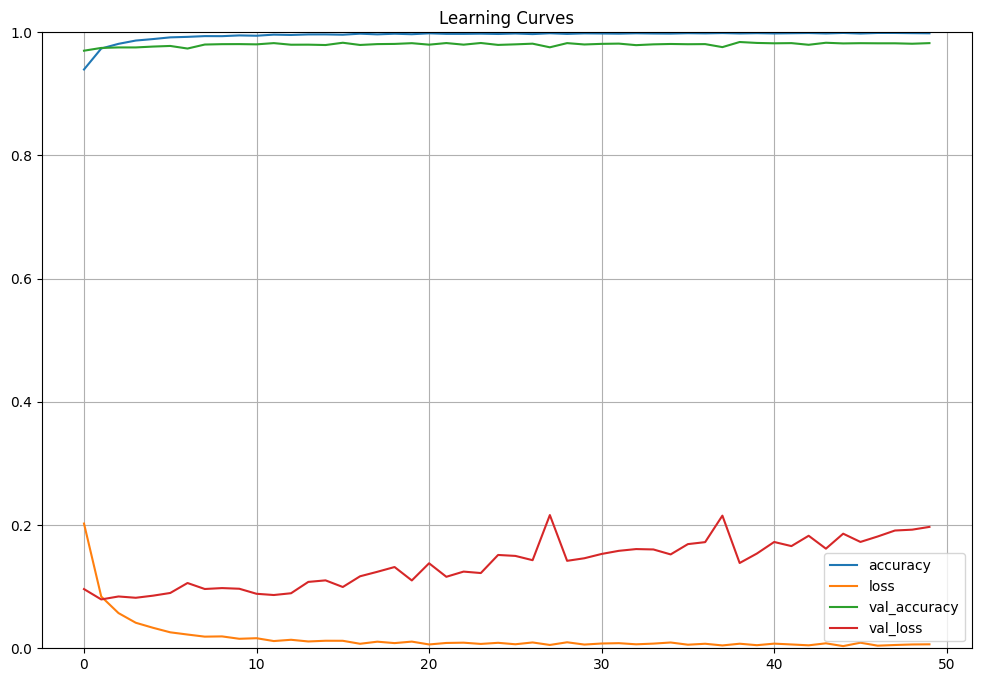

In [ ]:
df_history_final.plot(figsize=(12, 8),grid=True, title="Learning Curves",ylim=(0,1))

En las curvas de aprendizaje graficadas, no se muetra problema de Overffiting ni de Underffiting, ya que las curvas tienden a convegir a los valores imprimidas y ademas su gap no es demasiadao grande, ademas, las curvas de Validacion (val_loss) enta por encima de la curva de entreanmiento (mse) lo cual sugiere que el modelo esta teniendo un comportamiento esperado ya que presenta mejores valores en el entrenamiento que en el testeo. De manera similar ocurre con las curvas de val_accuracy que esta pode debajo de la curva de accuracy


In [ ]:
accuracy = best_model.evaluate(X_test, y_test, verbose=0)[1]
n = len(X_test)
z = 1.96

confidence_interval = z * np.sqrt((accuracy * (1 - accuracy)) / n)
lower_bound = accuracy - confidence_interval
upper_bound = accuracy + confidence_interval

print(f"Precisión del modelo en el conjunto de prueba: {accuracy * 100:.2f}%")
print(f"Intervalo de confianza para la precisión: ({lower_bound * 100:.2f}%, {upper_bound * 100:.2f}%)")

Precisión del modelo en el conjunto de prueba: 98.24%
Intervalo de confianza para la precisión: (97.98%, 98.50%)


Se puede observar como el modelo tiene un optimo redimiento con un Accuracy del 98.24.%, que ademas, presenta un intervalo de confianza entre 97.98% y 98.50%, lo cual sugiere que el modelo presenta robustez a la hora de realizar predicciones de datos nuevos

# Testeo

In [ ]:
prediccion_50 = best_model.predict(X_test[50].reshape(1, 28, 28))
print(f"Etiqueta real para X_test[50]: {y_test[50]}")
print(f"Predicción para X_test[50]: Clase predicha = {np.argmax(prediccion_50)}")
print ()
print ()
print(f"Etiqueta real para X_test[150]: {y_test[150]}")
prediccion_150 = best_model.predict(X_test[150].reshape(1, 28, 28))
print(f"Predicción para X_test[150]: Clase predicha = {np.argmax(prediccion_150)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Etiqueta real para X_test[50]: 6
Predicción para X_test[50]: Clase predicha = 6


Etiqueta real para X_test[150]: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicción para X_test[150]: Clase predicha = 9


# Entrenamiento de la red neuronal con todo el set de datos

In [ ]:
final_modelo = keras.models.Sequential([keras.layers.Input(shape=(28, 28)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
                                ])

final_modelo.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [ ]:
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))


historia_mejor_ultima = final_modelo.fit(X, y, epochs=50)

Epoch 1/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8975 - loss: 0.3343
Epoch 2/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9741 - loss: 0.0829
Epoch 3/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9834 - loss: 0.0510
Epoch 4/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9882 - loss: 0.0380
Epoch 5/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9896 - loss: 0.0301
Epoch 6/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9920 - loss: 0.0245
Epoch 7/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9933 - loss: 0.0202
Epoch 8/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9945 - loss: 0.0170
Epoch 9/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9945 - loss: 0.0164
Epoch 10/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9960 - loss: 0.0138
Epoch 11/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9955 - loss: 0.0133
Epoch 12/50
2188/21

# Se guarda el modelo elegido

In [ ]:
ruta_guardado = '/content/drive/MyDrive/mejor_modelo_final.keras'
final_modelo.save(ruta_guardado)

# Cargar el Mejor modelo

In [4]:
ruta_guardado = '/content/drive/MyDrive/mejor_modelo_final.keras'
modelo_cargado = load_model(ruta_guardado)

# Clasificacion de nuevas imagenes

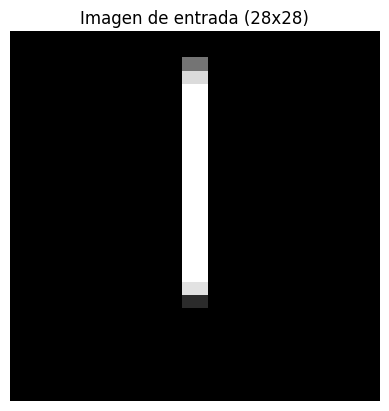

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicción de la imagen cargada: 1


In [5]:
image = cv2.imread('/content/drive/MyDrive/Imagen CV/numero 1 28x28.png', cv2.IMREAD_GRAYSCALE)

image_resized = cv2.resize(image, (28, 28))

plt.imshow(image_resized, cmap='gray')
plt.title("Imagen de entrada (28x28)")
plt.axis('off')
plt.show()

image_normalized = image_resized / 255.0

image_pred = modelo_cargado.predict(image_normalized.reshape(1, 28, 28))
print(f"Predicción de la imagen cargada: {image_pred.argmax()}")

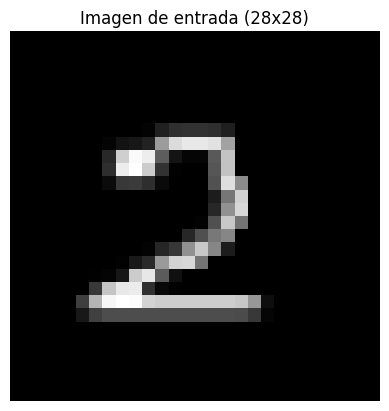

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicción de la imagen cargada: 2


In [6]:
image = cv2.imread('/content/drive/MyDrive/Imagen CV/numero 2 28x28.png', cv2.IMREAD_GRAYSCALE)

image_resized = cv2.resize(image, (28, 28))


plt.imshow(image_resized, cmap='gray')
plt.title("Imagen de entrada (28x28)")
plt.axis('off')
plt.show()

image_normalized = image_resized / 255.0

image_pred = modelo_cargado.predict(image_normalized.reshape(1, 28, 28))
print(f"Predicción de la imagen cargada: {image_pred.argmax()}")

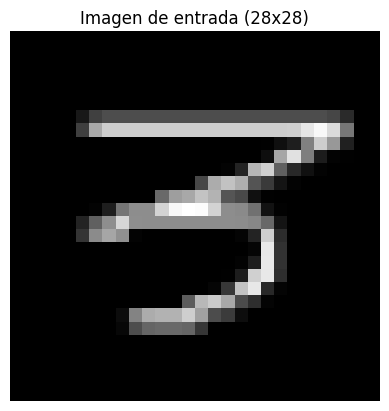

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicción de la imagen cargada: 3


In [7]:
image = cv2.imread('/content/drive/MyDrive/Imagen CV/numero 3 28x28.png', cv2.IMREAD_GRAYSCALE)

image_resized = cv2.resize(image, (28, 28))

plt.imshow(image_resized, cmap='gray')
plt.title("Imagen de entrada (28x28)")
plt.axis('off')
plt.show()

image_normalized = image_resized / 255.0

image_pred = modelo_cargado.predict(image_normalized.reshape(1, 28, 28))
print(f"Predicción de la imagen cargada: {image_pred.argmax()}")

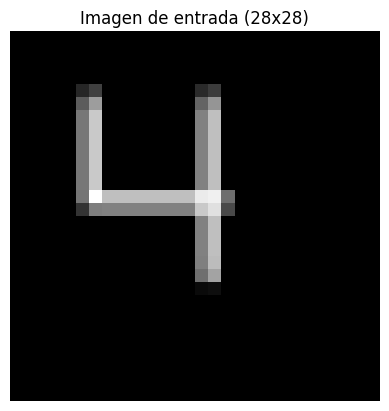

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicción de la imagen cargada: 4


In [8]:
image = cv2.imread('/content/drive/MyDrive/Imagen CV/numero 4 28x28.png', cv2.IMREAD_GRAYSCALE)

image_resized = cv2.resize(image, (28, 28))

plt.imshow(image_resized, cmap='gray')
plt.title("Imagen de entrada (28x28)")
plt.axis('off')
plt.show()

image_normalized = image_resized / 255.0

image_pred = modelo_cargado.predict(image_normalized.reshape(1, 28, 28))
print(f"Predicción de la imagen cargada: {image_pred.argmax()}")

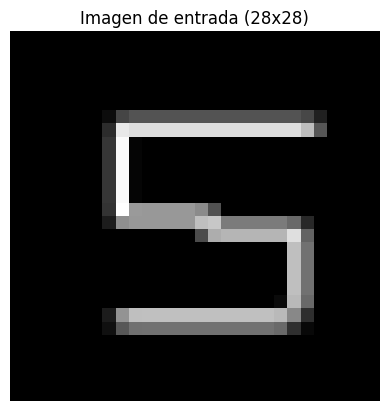

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicción de la imagen cargada: 5


In [9]:
image = cv2.imread('/content/drive/MyDrive/Imagen CV/numero 5 28x28.png', cv2.IMREAD_GRAYSCALE)

image_resized = cv2.resize(image, (28, 28))

plt.imshow(image_resized, cmap='gray')
plt.title("Imagen de entrada (28x28)")
plt.axis('off')
plt.show()

image_normalized = image_resized / 255.0

image_pred = modelo_cargado.predict(image_normalized.reshape(1, 28, 28))
print(f"Predicción de la imagen cargada: {image_pred.argmax()}")

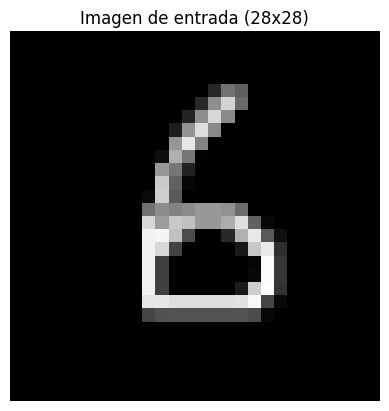

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicción de la imagen cargada: 6


In [10]:
image = cv2.imread('/content/drive/MyDrive/Imagen CV/numero 6 28x28.png', cv2.IMREAD_GRAYSCALE)

image_resized = cv2.resize(image, (28, 28))

plt.imshow(image_resized, cmap='gray')
plt.title("Imagen de entrada (28x28)")
plt.axis('off')
plt.show()

image_normalized = image_resized / 255.0

image_pred = modelo_cargado.predict(image_normalized.reshape(1, 28, 28))
print(f"Predicción de la imagen cargada: {image_pred.argmax()}")

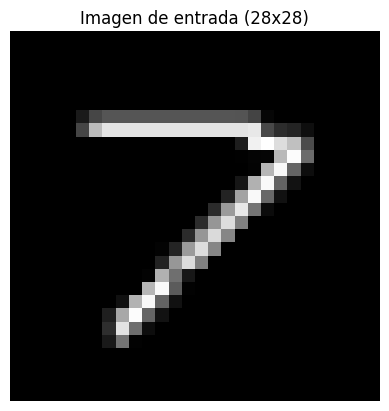

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicción de la imagen cargada: 7


In [11]:
image = cv2.imread('/content/drive/MyDrive/Imagen CV/numero 7 28x28.png', cv2.IMREAD_GRAYSCALE)

image_resized = cv2.resize(image, (28, 28))

plt.imshow(image_resized, cmap='gray')
plt.title("Imagen de entrada (28x28)")
plt.axis('off')
plt.show()

image_normalized = image_resized / 255.0

image_pred = modelo_cargado.predict(image_normalized.reshape(1, 28, 28))
print(f"Predicción de la imagen cargada: {image_pred.argmax()}")

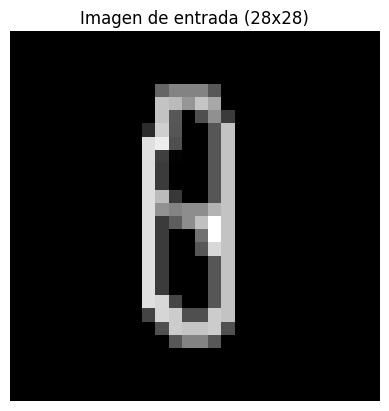

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicción de la imagen cargada: 8


In [12]:
image = cv2.imread('/content/drive/MyDrive/Imagen CV/imagen 8.png', cv2.IMREAD_GRAYSCALE)

image_resized = cv2.resize(image, (28, 28))


plt.imshow(image_resized, cmap='gray')
plt.title("Imagen de entrada (28x28)")
plt.axis('off')
plt.show()

image_normalized = image_resized / 255.0

image_pred = modelo_cargado.predict(image_normalized.reshape(1, 28, 28))
print(f"Predicción de la imagen cargada: {image_pred.argmax()}")

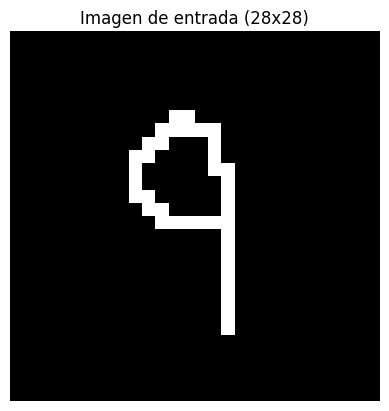

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicción de la imagen cargada: 9


In [13]:
image = cv2.imread('/content/drive/MyDrive/Imagen CV/9 numero.png', cv2.IMREAD_GRAYSCALE)

image_resized = cv2.resize(image, (28, 28))

plt.imshow(image_resized, cmap='gray')
plt.title("Imagen de entrada (28x28)")
plt.axis('off')
plt.show()

image_normalized = image_resized / 255.0

image_pred = modelo_cargado.predict(image_normalized.reshape(1, 28, 28))
print(f"Predicción de la imagen cargada: {image_pred.argmax()}")

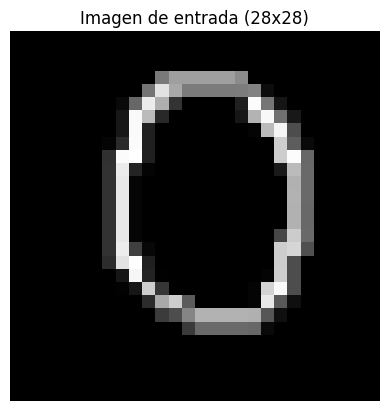

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicción de la imagen cargada: 0


In [14]:
image = cv2.imread('/content/drive/MyDrive/Imagen CV/0.png', cv2.IMREAD_GRAYSCALE)

image_resized = cv2.resize(image, (28, 28))

plt.imshow(image_resized, cmap='gray')
plt.title("Imagen de entrada (28x28)")
plt.axis('off')
plt.show()

image_normalized = image_resized / 255.0

image_pred = modelo_cargado.predict(image_normalized.reshape(1, 28, 28))
print(f"Predicción de la imagen cargada: {image_pred.argmax()}")

# Conclusion

Los resultados obtenidos en la fase de evaluación indican que el modelo logró un rendimiento perfecto, clasificando correctamente las 10 imágenes nuevas con una precisión del 100%. Este desempeño sugiere que el modelo ha capturado de manera efectiva las características distintivas necesarias para diferenciar cada clase, la clasificación perfecta de estas imágenes sugiere que la arquitectura y los parámetros del modelo están adecuadamente alineados con la naturaleza de los datos, permitiendo una generalización robusta.
